# Neural networks: Multi Layer Perceptron
## In this lab we will learn about Multi-layer Perceptrons



In [3]:
import numpy as np
import seaborn as sns
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data


# From sklearn we will use the implementations of the Multi-layer perceptron
from sklearn import cluster
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import binarize
from sklearn.neural_network import BernoulliRBM
from sklearn.datasets.mldata import fetch_mldata
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from keras.datasets import mnist


# We will also use different metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score
from sklearn import metrics





from IPython.display import display
from IPython.display import Image

Using TensorFlow backend.


In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(y_train)
y_train = np.array([1 if x > 4 else 0 for x in y_train])
print(y_train)
print(y_test)
y_test = np.array([1 if x > 4 else 0 for x in y_test])
print(y_test)


X_train = np.reshape(X_train, (60000, 28*28))
X_test = np.reshape(X_test, (10000, 28*28))
train_n_samples = 60000

[5 0 4 ... 5 6 8]
[1 0 0 ... 1 1 1]
[7 2 1 ... 4 5 6]
[1 0 0 ... 0 1 1]


## Exercise 1

Now that we know how to create a MLP the easy way, we are going to give one step further, and design a MLP using tensorflow from scratch.

Suggestion: Use the same technique used in the tensorflow notebook to design te MLP. Following the notation used in that notebook (in which we formalized the linear models, y = W*X + b), design a one-hidden-layer MLP, which can be defined as y = (W1*X + b1)*W2 + b2. The rest of the tensorflow components (loss function, optimizer, ...) need no changes to work with this model. The MLP will have one single hidden layer, of 100 neurons.

Take into account that this model will be used for **binary classification** (this affects the loss function that needs to be optimized).

In [70]:
# This example has two hidden layers y = ((W1*X + b1)*W2 + b2)*W3 + b3

tf.reset_default_graph()
mini_batch_size = 100

X = tf.placeholder("float", shape=[None, 784], name="X")
Y = tf.placeholder("float", shape=[None, 1], name="y")

W1 = tf.Variable(tf.random_normal((784, 100)), name="weight1")
b1 = tf.Variable(tf.random_normal((100,)), name="bias1")

# Declare the rest of variables

W2 = tf.Variable(tf.random_normal((100, 100)), name="weight2")
b2 = tf.Variable(tf.random_normal((100,)), name="bias2")

W3 = tf.Variable(tf.random_normal((100, 1)), name="weight3")
b3 = tf.Variable(tf.random_normal((1,)), name="bias3")

# Create the model

layer1 = tf.add(tf.matmul(X, W1), b1)

#layer2 = tf.add(tf.matmul(layer1, W2), b2)
variable_list = [W1, W2, W3, b1, b2, b3]

prediction_for_entropy_loss = tf.add(tf.matmul(layer1, W3), b3)  # https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits

prediction_for_likelihood_loss = tf.sigmoid(prediction_for_entropy_loss)

loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=prediction_for_entropy_loss, labels=Y))

# Depending on the precission you are using, you will need to add the "0.0001" in order to avoid log(0)
#loss = -tf.reduce_sum(Y*tf.log(prediction_for_likelihood_loss+0.0001) + (1-Y)*tf.log(1-prediction_for_likelihood_loss+0.0001))

In [71]:
learning_rate = 0.0001

adam = tf.train.AdamOptimizer(learning_rate)

optimizer = adam.minimize(loss)

init = tf.global_variables_initializer()

training_epochs = 100000
display_step = 1000
perm = np.random.permutation(train_n_samples)


n_batch = train_n_samples // mini_batch_size + (train_n_samples % mini_batch_size != 0)

## Exercise 2

Use the designed MLP to learn a **classifier** for the MNIST dataset that was used in the example. You can reuse the training algorithm used in the tensorflow notebook to train this model.

Optional: Along with the error, display the accuracy of the model while training it. For that, you will have to compute it each time (inside the display_step *if*), or use a tensorflow operation (which will be a more optimized and sophisticated approach). For the first option, you will have to compute the predictions and compare them with the actual labels. For the second option, you will have to compute a "secondary loss function" which is not used for optimization, but only to show results.

In [72]:
init = tf.global_variables_initializer()


with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as sess:

    sess.run(init)

    for epoch in range(training_epochs):
        i_batch = (epoch % n_batch)*mini_batch_size
        batch = X_train[i_batch:i_batch+mini_batch_size], y_train[i_batch:i_batch+mini_batch_size]        
        sess.run(optimizer, feed_dict={X: batch[0], Y: np.reshape(batch[1], (-1,1))})
        
        
        if (epoch+1) % display_step == 0:
            err, p = sess.run((loss, tf.nn.sigmoid(loss)), feed_dict={X: X_test,  Y: np.reshape(y_test, (-1,1))})
            
            # Compute and show the accuracy of the model
            
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(err))

    training_loss = sess.run(loss, feed_dict={X: X_test, Y: np.reshape(y_test, (-1,1))})
    print("Training loss=", training_loss, '\n')
    weights_to_visualize = sess.run(W1)
    

Epoch: 1000 cost= 7.335976601
Epoch: 2000 cost= 4.443508625
Epoch: 3000 cost= 3.435271025
Epoch: 4000 cost= 2.885394812
Epoch: 5000 cost= 2.510920286
Epoch: 6000 cost= 2.246384144
Epoch: 7000 cost= 2.039499521
Epoch: 8000 cost= 1.849834800
Epoch: 9000 cost= 1.700612545
Epoch: 10000 cost= 1.567647219
Epoch: 11000 cost= 1.441897988
Epoch: 12000 cost= 1.333813906
Epoch: 13000 cost= 1.230974436
Epoch: 14000 cost= 1.136151314
Epoch: 15000 cost= 1.057455778
Epoch: 16000 cost= 0.974955857
Epoch: 17000 cost= 0.899469435
Epoch: 18000 cost= 0.841250896
Epoch: 19000 cost= 0.778363645
Epoch: 20000 cost= 0.716514945
Epoch: 21000 cost= 0.672145188
Epoch: 22000 cost= 0.632422149
Epoch: 23000 cost= 0.580188692
Epoch: 24000 cost= 0.550226986
Epoch: 25000 cost= 0.531269372
Epoch: 26000 cost= 0.485488772
Epoch: 27000 cost= 0.469887108
Epoch: 28000 cost= 0.468614638
Epoch: 29000 cost= 0.424760550
Epoch: 30000 cost= 0.422518790
Epoch: 31000 cost= 0.432802051
Epoch: 32000 cost= 0.388372898
Epoch: 33000 cost

## Exercise 3 

Modify the visualize_coefs function so that it can show some of the coefficients in the first layer of the learned network. Instead of accessing the coefficients computed in the mlp object, you will have to show the coefficients computed in the weight variables.

In [77]:
def visualize_coefs(W):
    """
    clf must be the instanced (and trained) classifier
    """
    fig, axes = plt.subplots(4, 4)
    # use global min / max to ensure all weights are shown on the same scale
    vmin, vmax = W.min(), W.max()
    for coef, ax in zip(W.T, axes.ravel()):
        ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

    plt.show()

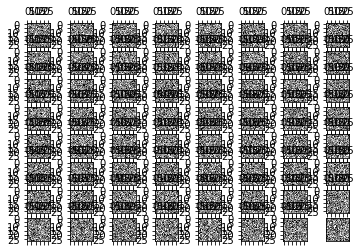

In [78]:
visualize_coefs(weights_to_visualize)